In [35]:
import pandas as pd

In [36]:
data=pd.read_csv('C:/Users/DELL/OneDrive/Documents/data science asignments/Decision Tree/Decision Tree/HD.csv')

In [37]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0


Exploratory Data Analysis (EDA):

In [38]:
# Forward fill missing values
data.ffill(inplace=True)  # This will fill NaN values with the last valid observation

In [39]:
# Check for remaining missing values
remaining_missing_values = data.isnull().sum()
print(remaining_missing_values)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64


In [40]:
# Check for remaining missing values
remaining_missing_values = data.isnull().sum()
print(remaining_missing_values)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64


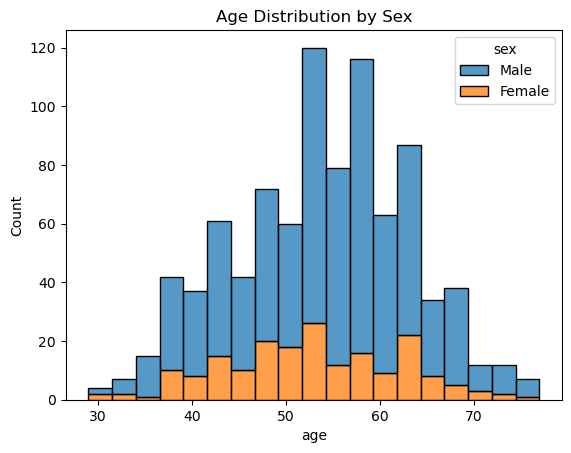

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize age distribution by sex
sns.histplot(data=data, x='age', hue='sex', multiple='stack')
plt.title('Age Distribution by Sex')
plt.show()

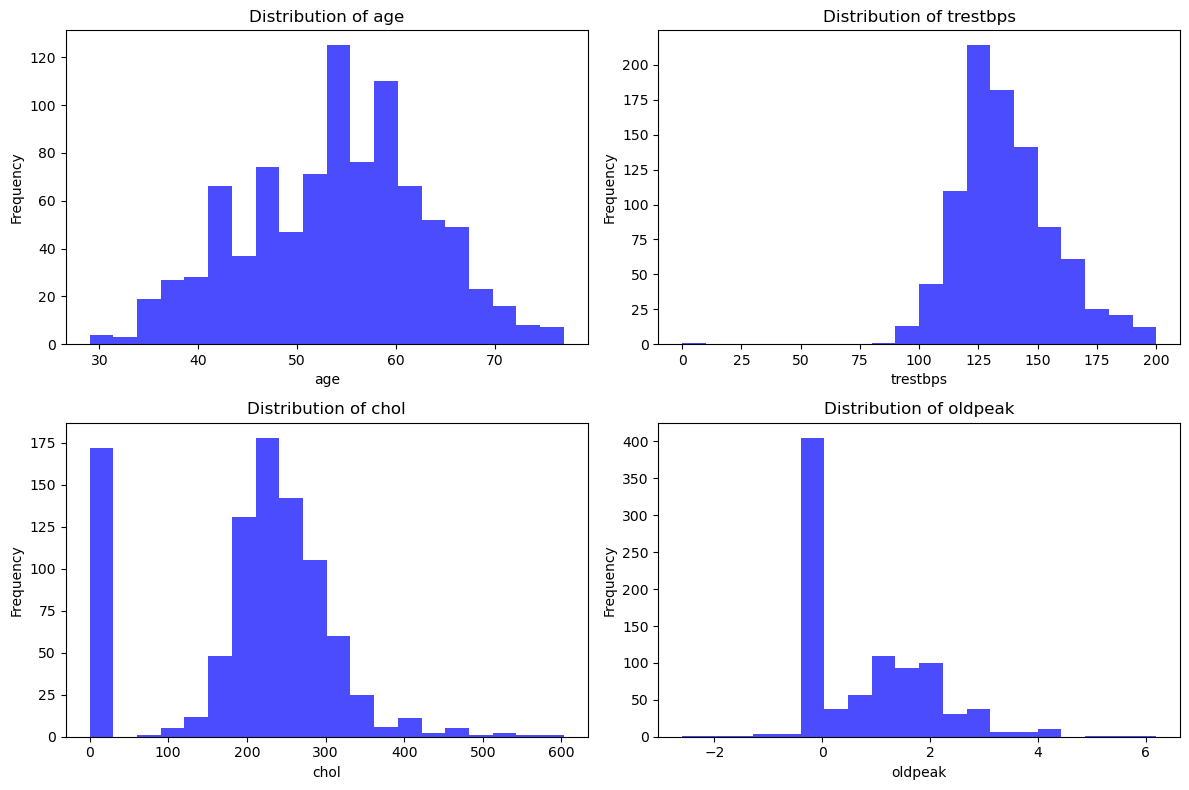

In [42]:
import matplotlib.pyplot as plt

# Set up the histogram for each numerical feature
numerical_features = ['age', 'trestbps', 'chol', 'oldpeak']

plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    plt.hist(data[feature].dropna(), bins=20, color='blue', alpha=0.7)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

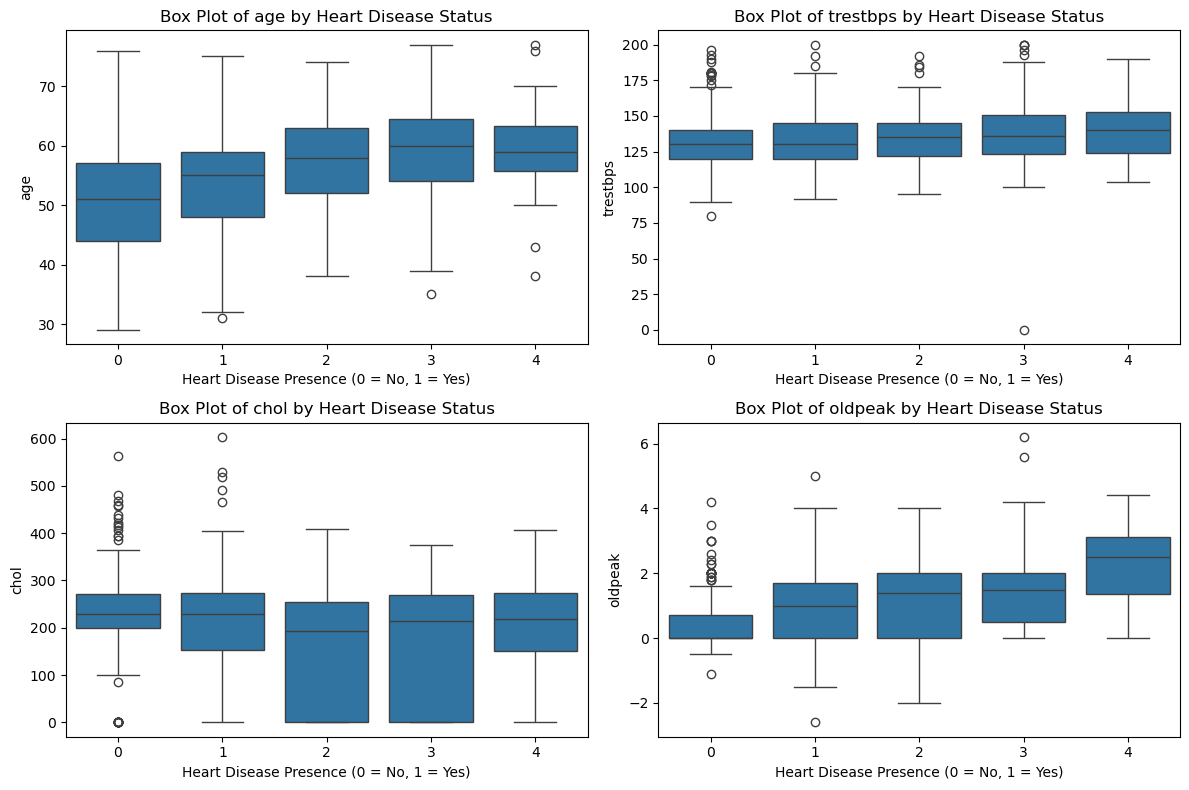

In [43]:
import seaborn as sns

plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=data['num'], y=data[feature])  # 'num' is the target variable indicating heart disease presence
    plt.title(f'Box Plot of {feature} by Heart Disease Status')
    plt.xlabel('Heart Disease Presence (0 = No, 1 = Yes)')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

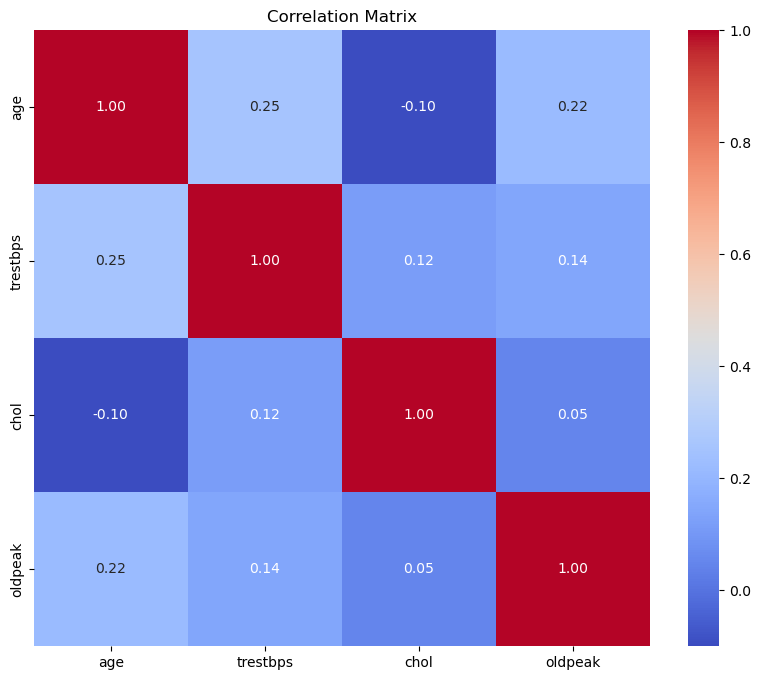

In [44]:
# Calculate the correlation matrix
correlation_matrix = data[numerical_features].corr()

# Set up the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

Histograms: For visualizing the distribution of each numerical feature.
Box Plots: To identify outliers and compare distributions across heart disease presence.
Correlation Matrix: To understand relationships between numerical features.

. Feature Engineering:
If necessary, perform feature engineering techniques such as encoding categorical variables, scaling numerical features, or handling missing values


In [45]:
# One-hot encoding for categorical variables
data = pd.get_dummies(data, columns=['sex', 'cp', 'fbs', 'restecg', 'slope', 'thal', 'exang'], drop_first=True)

# If you have ordinal categories, you might use label encoding instead.

In [46]:
# Display the first few rows of the modified DataFrame
print(data.head())

   age  trestbps  chol  thalch  oldpeak  num  sex_Male  cp_atypical angina  \
0   63       145   233     150      2.3    0      True               False   
1   41       135   203     132      0.0    0      True                True   
2   57       140   192     148      0.4    0      True               False   
3   52       118   186     190      0.0    0      True               False   
4   57       110   201     126      1.5    0      True               False   

   cp_non-anginal  cp_typical angina  fbs_True  restecg_normal  \
0           False               True      True           False   
1           False              False     False            True   
2           False              False     False            True   
3           False               True     False           False   
4           False              False     False            True   

   restecg_st-t abnormality  slope_flat  slope_upsloping  thal_normal  \
0                     False       False            False     

Decision Tree Classification:
Split the dataset into training and testing sets (e.g., using an 80-20 split).


In [47]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = data.drop('num', axis=1)  # Features (all columns except target)
y = data['num']                # Target variable (heart disease presence)

# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [49]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print(classification_report(y_test, y_pred))

# Display confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion_mat)

Accuracy: 0.50
              precision    recall  f1-score   support

           0       0.65      0.72      0.68        89
           1       0.37      0.40      0.38        48
           2       0.25      0.14      0.18        22
           3       0.25      0.24      0.24        17
           4       0.33      0.17      0.22         6

    accuracy                           0.50       182
   macro avg       0.37      0.33      0.34       182
weighted avg       0.48      0.50      0.48       182

Confusion Matrix:
[[64 15  5  4  1]
 [22 19  2  5  0]
 [ 4 12  3  2  1]
 [ 6  5  2  4  0]
 [ 3  1  0  1  1]]


In [50]:
data.head()

,age,trestbps,chol,thalch,oldpeak,num,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,fbs_True,restecg_normal,restecg_st-t abnormality,slope_flat,slope_upsloping,thal_normal,thal_reversable defect,exang_TRUE,exang_TURE
0,63,145,233,150,2.3,0,True,False,False,True,True,False,False,False,False,False,False,False,False
1,41,135,203,132,0.0,0,True,True,False,False,False,True,False,True,False,False,False,False,False
2,57,140,192,148,0.4,0,True,False,False,False,False,True,False,True,False,False,False,False,False
3,52,118,186,190,0.0,0,True,False,False,True,False,False,False,True,False,False,False,False,False
4,57,110,201,126,1.5,0,True,False,False,False,False,True,False,True,False,False,False,True,False


In [56]:
# Check unique values in the target variable
print("Unique values in target variable:", y.unique())

Unique values in target variable: [0 1 2 3 4]


In [57]:
# Check unique values in predictions
print("Unique values in predictions:", set(y_pred))

Unique values in predictions: {0, 1, 2, 3, 4}


In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report


# Handle missing values (if any)
data.ffill(inplace=True)

# Scale numerical features
numerical_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Split into features and target variable
X = data.drop('num', axis=1)  # Features (all columns except target)
y = data['num']                # Target variable (heart disease presence)

# Check unique values in the target variable
print("Unique values in target variable:", y.unique())

# Split into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up hyperparameter tuning using GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10]
}

dt_classifier = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt_classifier,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=1,
                           n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")

# Evaluate the model with best parameters on the test set
y_pred = best_estimator.predict(X_test)

# Check unique values in predictions
print("Unique values in predictions:", set(y_pred))

# Calculate evaluation metrics for multiclass classification
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Use weighted average for multiclass
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, best_estimator.predict_proba(X_test), multi_class='ovr')  # Use one-vs-rest for ROC AUC

# Print evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC Score: {roc_auc:.2f}')

# Print classification report for detailed metrics
print(classification_report(y_test, y_pred))

Unique values in target variable: [0 1 2 3 4]
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
Unique values in predictions: {0, 1, 2, 3, 4}
Accuracy: 0.54
Precision: 0.48
Recall: 0.54
F1 Score: 0.51
ROC AUC Score: 0.70
              precision    recall  f1-score   support

           0       0.72      0.82      0.76        89
           1       0.38      0.48      0.42        48
           2       0.00      0.00      0.00        22
           3       0.25      0.12      0.16        17
           4       0.14      0.17      0.15         6

    accuracy                           0.54       182
   macro avg       0.30      0.32      0.30       182
weighted avg       0.48      0.54      0.51       182



Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
Accuracy: 0.54
Precision: 0.48
Recall: 0.54
F1 Score: 0.51
ROC AUC Score: 0.70
              precision    recall  f1-score   support

           0       0.72      0.82      0.76        89
           1       0.38      0.48      0.42        48
           2       0.00      0.00      0.00        22
           3       0.25      0.12      0.16        17
           4       0.14      0.17      0.15         6

    accuracy                           0.54       182
   macro avg       0.30      0.32      0.30       182
weighted avg       0.48      0.54      0.51       182



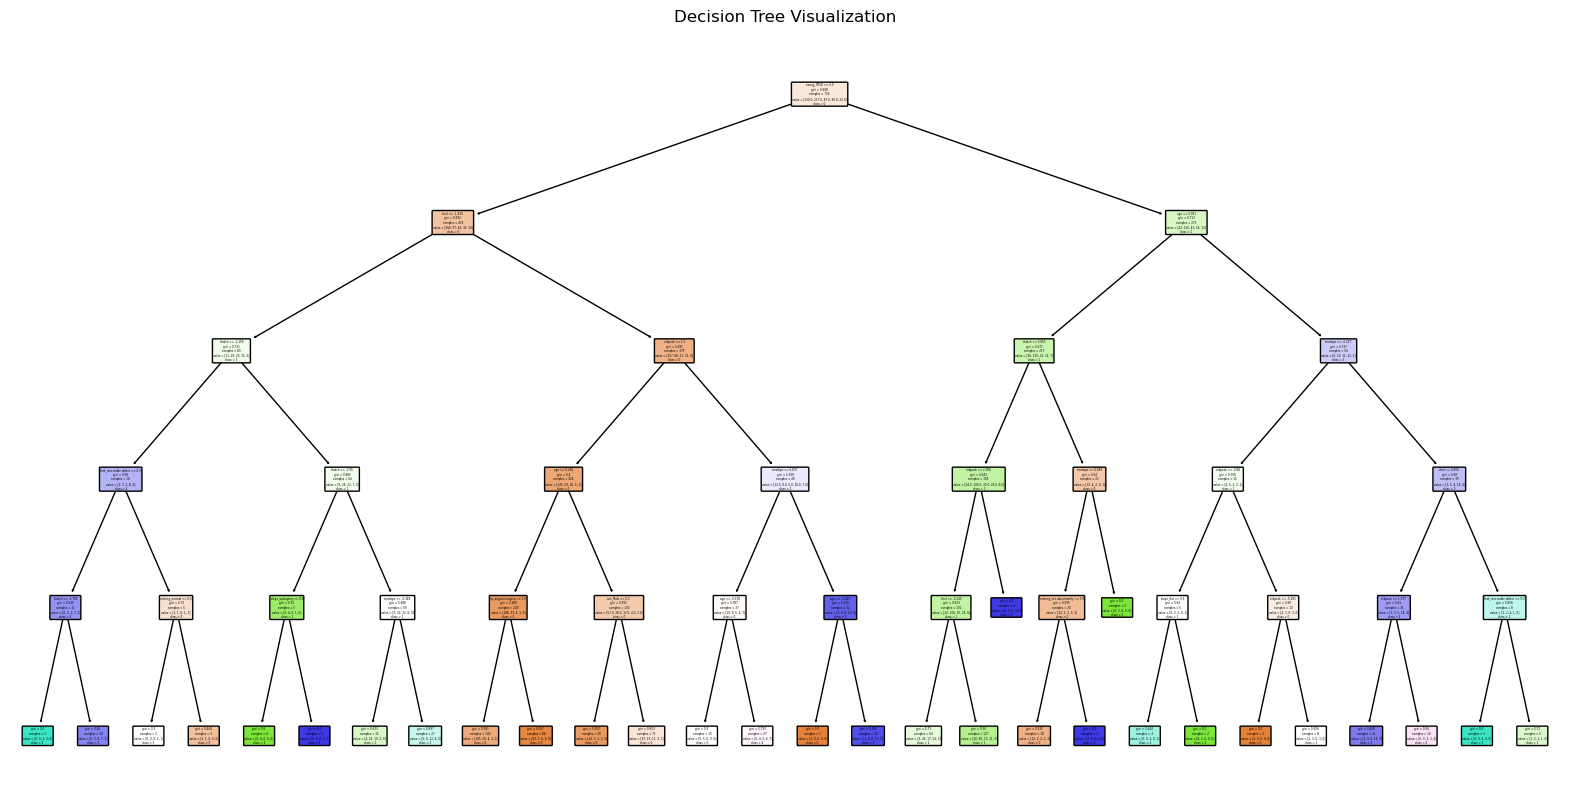

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
import matplotlib.pyplot as plt


# Handle missing values (if any)
data.ffill(inplace=True)

# Scale numerical features
numerical_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Split into features and target variable
X = data.drop('num', axis=1)  # Features (all columns except target)
y = data['num']                # Target variable (heart disease presence)

# Split into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up hyperparameter tuning using GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10]
}

dt_classifier = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt_classifier,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=1,
                           n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")

# Evaluate the model with best parameters on the test set
y_pred = best_estimator.predict(X_test)

# Calculate evaluation metrics for multiclass classification
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, best_estimator.predict_proba(X_test), multi_class='ovr')

# Print evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC Score: {roc_auc:.2f}')

# Print classification report for detailed metrics
print(classification_report(y_test, y_pred))

# Visualize the decision tree structure
plt.figure(figsize=(20, 10))
plot_tree(best_estimator,
          feature_names=X.columns,
          class_names=[str(i) for i in sorted(y.unique())],
          filled=True,
          rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

Model Evaluation and Analysis
Interpret the Evaluation Metrics: You have calculated several metrics for your model, including accuracy, precision, recall, F1-score, and ROC AUC. Here’s how to interpret them based on the results you provided:
Accuracy (0.54): This indicates that 54% of the predictions made by the model are correct. While this is better than random guessing for a multiclass problem, it suggests that the model may not be performing optimally.
Precision (0.48): This means that when the model predicts a class, it is correct 48% of the time on average across all classes. This is relatively low, indicating that there may be many false positives.
Recall (0.54): This indicates that the model correctly identifies 54% of actual positive instances across all classes. A recall of 54% suggests that the model misses a significant number of true positives.
F1 Score (0.51): This score balances precision and recall. An F1 score of 0.51 indicates a moderate performance but highlights that there is room for improvement.
ROC AUC Score (0.70): This score indicates how well the model can distinguish between classes. A score of 0.70 is considered acceptable but not excellent.
Class-wise Performance: The classification report shows varying performance across different classes:
Class 0 has good precision (0.72) and recall (0.82), indicating it is well-predicted.
Classes 1 and 2 have low precision and recall, indicating they are poorly predicted.
Classes 3 and 4 also show low performance, suggesting that the model struggles with these classes.

Key Insights from Visualization
Tree Structure: The visualization will show how splits are made at each node based on feature values.
Feature Importance: The color intensity in the nodes indicates the class distribution at that node; you can see which features are most important in making decisions.
Decision Rules: Each path from root to leaf represents a decision rule leading to a prediction.

Interview Questions:



1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
Hyperparameters are settings that are not learned from the data but are set prior to the training process. Here are some common hyperparameters for Decision Tree models and their effects on model performance:
max_depth: This parameter specifies the maximum depth of the tree. Limiting the depth can prevent overfitting, where the model learns noise in the training data instead of general patterns. A shallow tree may underfit, while a very deep tree may overfit.
min_samples_split: This is the minimum number of samples required to split an internal node. Increasing this value can lead to a more generalized model, reducing overfitting by requiring more data points to make a split.
min_samples_leaf: This parameter sets the minimum number of samples that must be present in a leaf node. Higher values prevent the model from creating leaf nodes that contain very few samples, which can help in reducing overfitting.
criterion: This determines how the quality of a split is measured. Common options include:
gini: Measures impurity based on Gini impurity.
entropy: Measures impurity based on information gain.
The choice of criterion can affect how splits are made and ultimately influence model performance.
max_features: This parameter controls the number of features to consider when looking for the best split. Limiting features can help in reducing overfitting and improving generalization.




3. What is the difference between the Label encoding and One-hot encoding?
Both Label Encoding and One-Hot Encoding are techniques used to convert categorical variables into numerical formats that can be used by machine learning algorithms.
Label Encoding:
Converts each category into a unique integer value.
Example: For a feature "Color" with categories ["Red", "Green", "Blue"], it might be encoded as:
Red: 0
Green: 1
Blue: 2
Pros: Simple and uses less memory.
Cons: Implies an ordinal relationship between categories, which may not be appropriate (e.g., Red < Green < Blue).
One-Hot Encoding:
Converts each category into a new binary column (0 or 1) for each category.
Example: For "Color" with categories ["Red", "Green", "Blue"], it would create:
Color_Red: [1, 0, 0]
Color_Green: [0, 1, 0]
Color_Blue: [0, 0, 1]
Pros: Does not imply any ordinal relationship; each category is treated independently.
Cons: Increases dimensionality significantly if there are many categories, which can lead to increased computational costs and potential overfitting.
Conclusion
Understanding hyperparameters is crucial for optimizing Decision Tree models, as they directly affect model complexity and performance. Additionally, knowing when to use Label Encoding versus One-Hot Encoding is essential for correctly preparing categorical data for machine learning algorithms.
